<a href="https://colab.research.google.com/github/MuhammedAshraf2020/Paper2Code/blob/main/04%20-%20Attention%20is%20all%20you%20need/Attention_is_all_you_need_with_translation_expermintal_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Translation Using Transformer

### install dependencies

In [5]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.9 MB 5.2 MB/s 
     |████████████████████████████████| 776.8 MB 18 kB/s 
     |████████████████████████████████| 144 kB 72.8 MB/s 
     |████████████████████████████████| 74 kB 4.5 MB/s 
     |████████████████████████████████| 112 kB 26.6 MB/s 
     |████████████████████████████████| 596 kB 60.3 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=434be6bcf757df2f57e67df4de52c1dcd1c6964ab9c354d05e5d17f76553188c
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+c

### import needed libs

In [6]:
# import libs
import torch
import spacy

import torch.optim as optim
import torch.nn as nn

import numpy as np
import pandas as pd

from torchtext.data import Field , TabularDataset 
from torchtext.data.iterator import BucketIterator

### setup environment configurations

In [7]:
# add some configurations
manual_seed = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.manual_seed(manual_seed)
torch.backends.cudnn.deterministic = True

In [13]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc





### Train - Test Model

In [ ]:
# visualize sample of the dataset 
import pandas as pd
pd.read_csv("/content/translation_train.csv")

,english,german
0,"Two young, White males are outside near many b...",Zwei junge weiße Männer sind im Freien in der ...
1,Several men in hard hats are operating a giant...,Mehrere Männer mit Schutzhelmen bedienen ein A...
2,A little girl climbing into a wooden playhouse.,Ein kleines Mädchen klettert in ein Spielhaus ...
3,A man in a blue shirt is standing on a ladder ...,Ein Mann in einem blauen Hemd steht auf einer ...
4,Two men are at the stove preparing food.,Zwei Männer stehen am Herd und bereiten Essen zu.
...,...,...
28995,A woman behind a scrolled wall is writing,Eine Frau schreibt hinter einer verschnörkelte...
28996,A rock climber practices on a rock climbing wall.,Ein Bergsteiger übt an einer Kletterwand.
28997,Two male construction workers are working on a...,Zwei Bauarbeiter arbeiten auf einer Straße vor...
28998,An elderly man sits outside a storefront accom...,Ein älterer Mann sitzt mit einem Jungen mit ei...


In [14]:
!python3 train.py

/usr/local/lib/python3.7/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
downloading training.tar.gz
[2022-08-19 14:37:40,361][root][INFO] - Downloading file training.tar.gz to .data/multi30k/training.tar.gz.
training.tar.gz: 100% 1.21M/1.21M [00:01<00:00, 799kB/s] 
[2022-08-19 14:37:41,873][root][INFO] - File .data/multi30k/training.tar.gz downloaded.
downloading validation.tar.gz
[2022-08-19 14:37:42,553][root][INFO] - Downloading file validation.tar.gz to .data/multi30k/validation.tar.gz.
validation.tar.gz: 100% 46.3k/46.3k [00:00<00:00, 232kB/s]
[2022-08-19 14:37:42,754][root][INFO] - File .data/multi30k/validation.tar.gz downloaded.
downloading mmt_task1_tes

german sentence is :  ein mann rollt einen runden tisch über den boden .

our model output is :  a man rolling a round table over the ground . <eos>

In [18]:
!python3 inference.py --sentence 'ein mann rollt einen runden tisch über den boden.' \
           --model_path '/content/checkpoint/transformer-epoch(25).pt' \
           --tokenizers_path '/content/tokenizers/tokenizer.pickle' \
           --visualize_attention

['a', 'man', 'rolling', 'a', 'round', 'table', 'over', 'the', 'ground', '.', '<eos>']


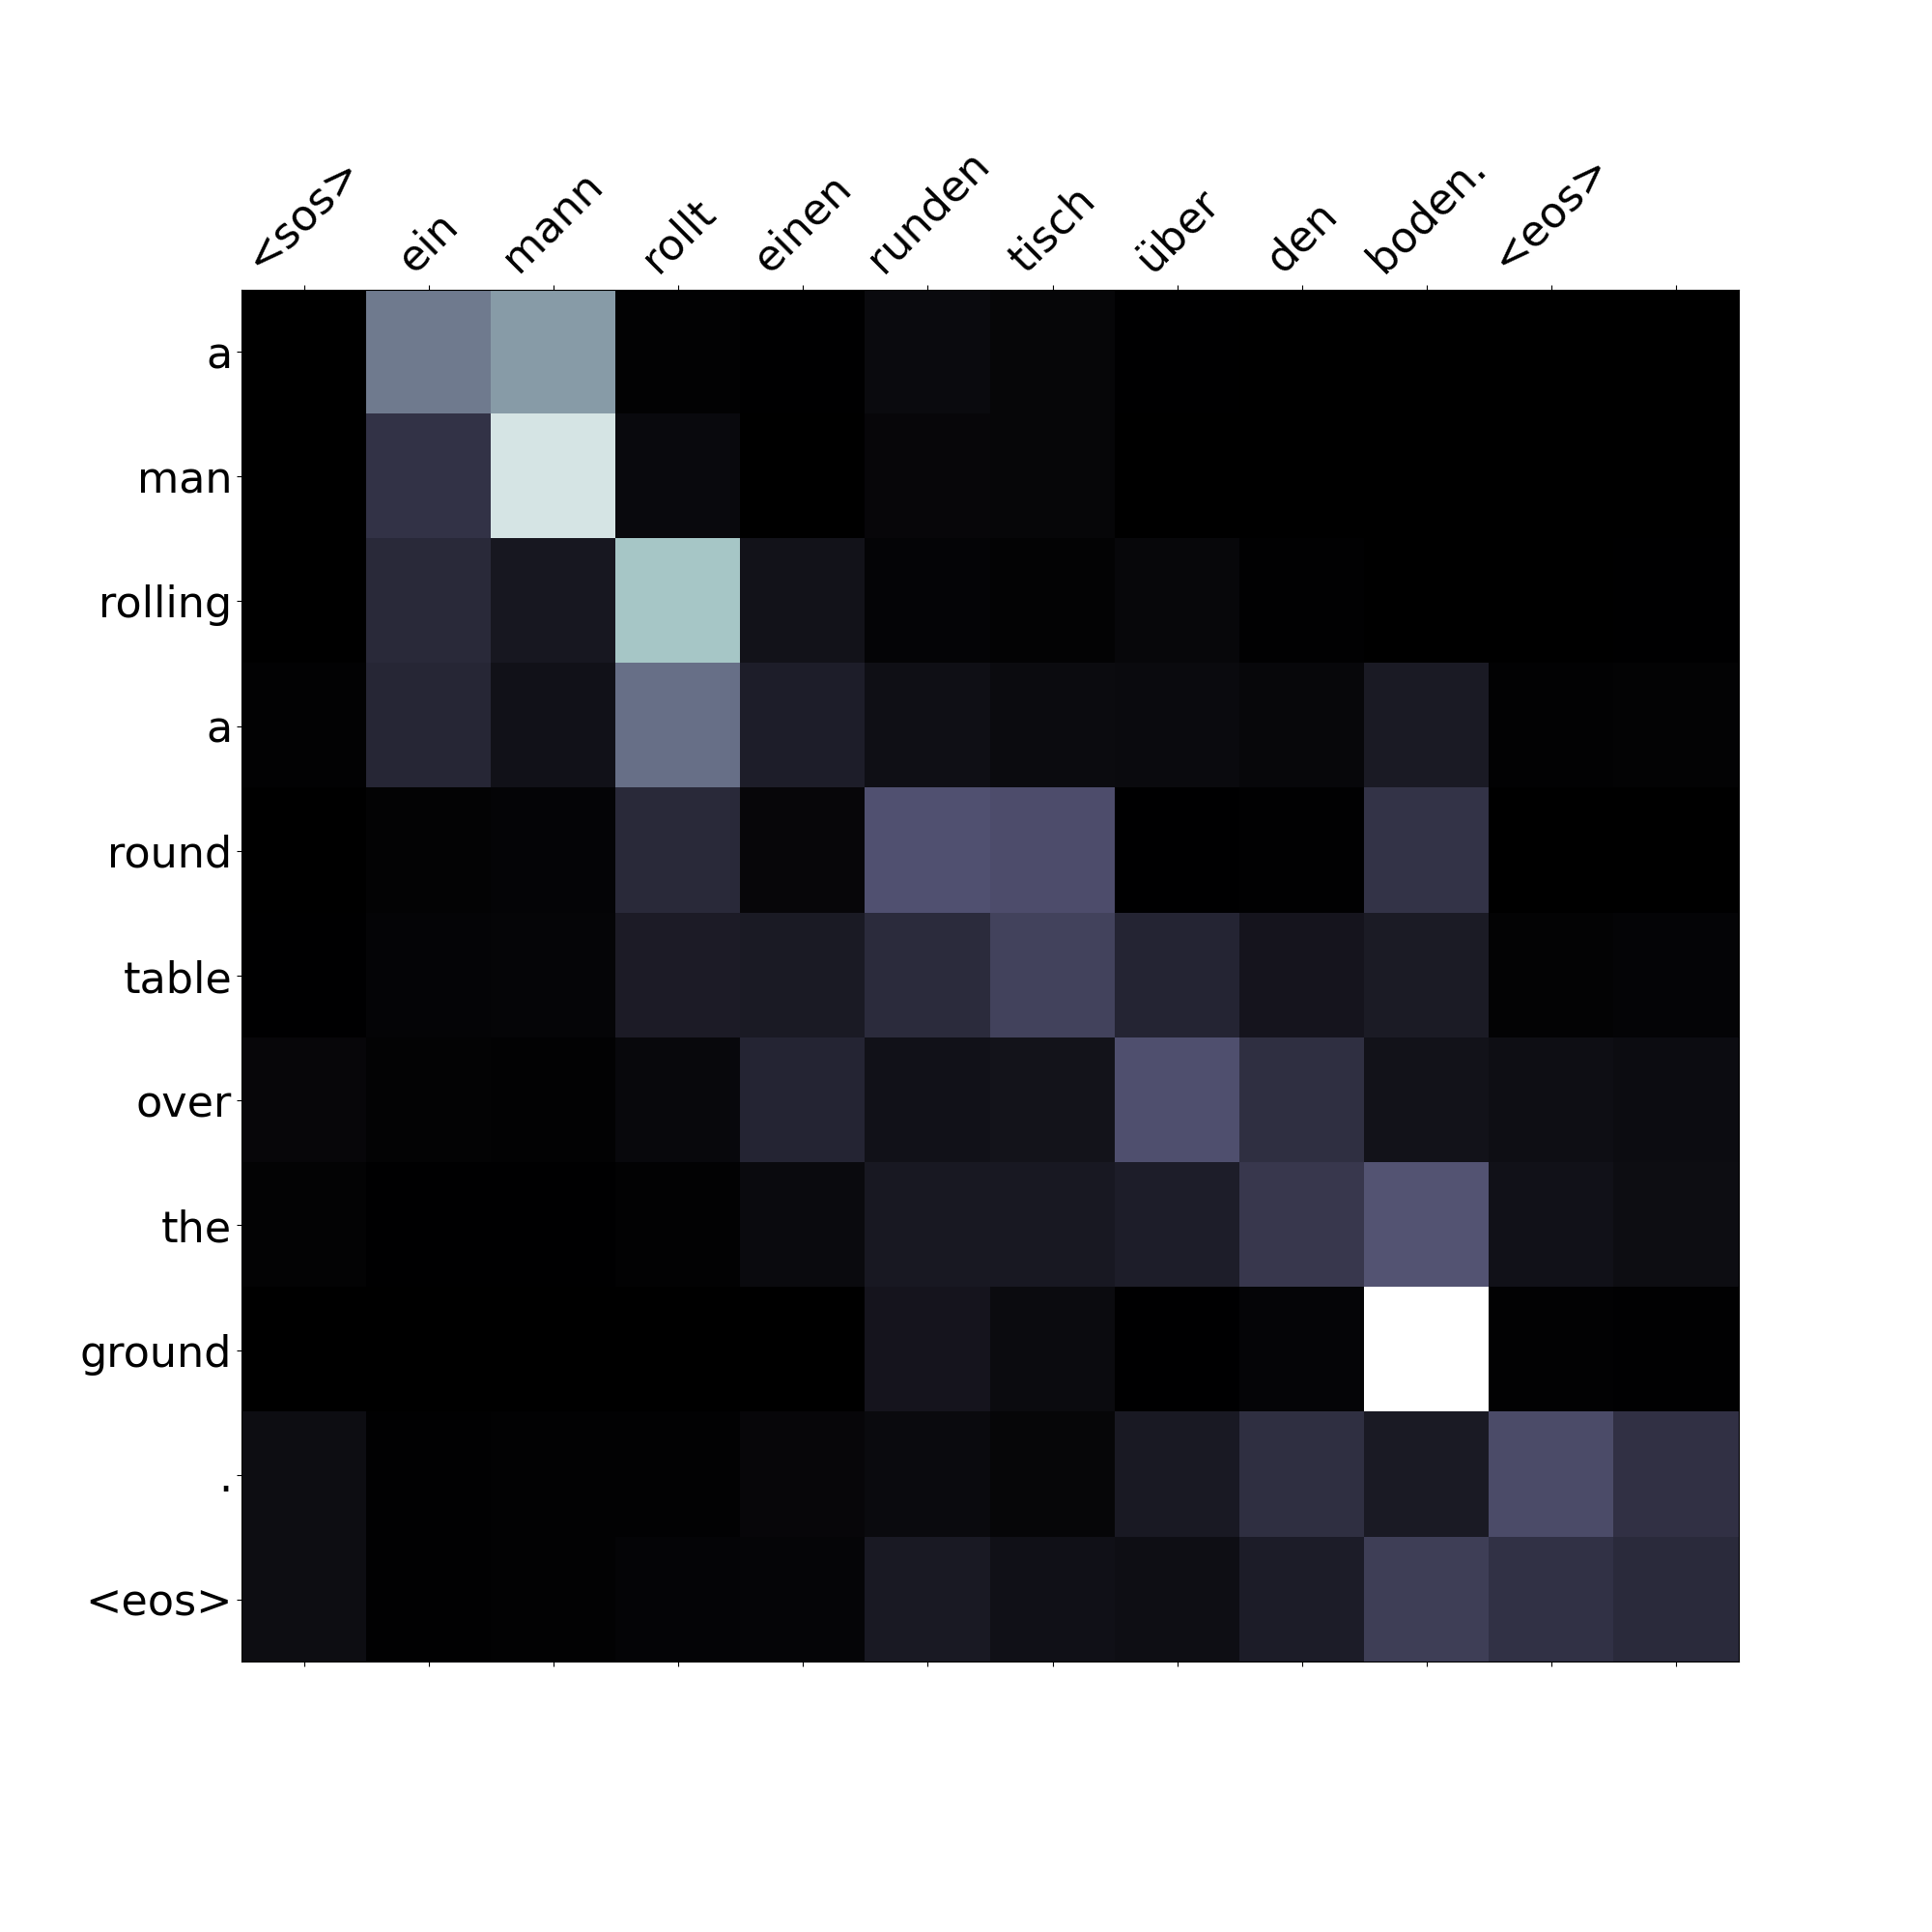

In [19]:
from IPython.display import Image
Image('attention.png')